In [4]:
from pyspark.sql import SparkSession 

sc = SparkSession.builder.appName("Visualizando").config("spark.driver.memory", "8g").getOrCreate()


In [5]:
import pyspark.sql.functions as F

DATA_PATH = "/app/data/"
input_file = DATA_PATH+"dados_log_urna/" 

df = sc.read.parquet(input_file)

df.show()

+--------------------+----------+-------------------+------------------+---------+--------------+---------------+---------------+----------------+---------------+
|             arquivo|id_eleitor|               data|         descricao|Municipio|Zona_Eleitoral|Secao_Eleitoral|erros_ate_agora|sum(erros_tecla)|tempo(segundos)|
+--------------------+----------+-------------------+------------------+---------+--------------+---------------+---------------+----------------+---------------+
|file:///app/data/...|        11|2022-10-02 08:42:46|  Deputado Federal|    16004|            21|             16|              0|               0|             28|
|file:///app/data/...|        11|2022-10-02 08:43:04| Deputado Estadual|    16004|            21|             16|              0|               0|             18|
|file:///app/data/...|        11|2022-10-02 08:43:16|           Senador|    16004|            21|             16|              0|               0|             12|
|file:///app/data/...|

In [21]:
df.sort(F.desc("sum(erros_tecla)")).show()

+--------------------+----------+-------------------+------------------+---------+--------------+---------------+---------------+----------------+---------------+
|             arquivo|id_eleitor|               data|         descricao|Municipio|Zona_Eleitoral|Secao_Eleitoral|erros_ate_agora|sum(erros_tecla)|tempo(segundos)|
+--------------------+----------+-------------------+------------------+---------+--------------+---------------+---------------+----------------+---------------+
|file:///app/data/...|        22|2022-10-02 09:33:05|        Governador|    17817|            12|            175|            480|             482|            299|
|file:///app/data/...|        22|2022-10-02 09:15:47|  Deputado Federal|    17817|            12|            175|             59|             482|            311|
|file:///app/data/...|        22|2022-10-02 09:21:35| Deputado Estadual|    17817|            12|            175|            168|             482|            348|
|file:///app/data/...|

In [11]:
max_values = df.groupBy("arquivo", "id_eleitor").max("sum(erros_tecla)")
max_values.show()

+--------------------+----------+---------------------+
|             arquivo|id_eleitor|max(sum(erros_tecla))|
+--------------------+----------+---------------------+
|file:///app/data/...|        47|                    2|
|file:///app/data/...|       170|                    4|
|file:///app/data/...|        24|                    0|
|file:///app/data/...|       119|                    0|
|file:///app/data/...|       265|                    0|
|file:///app/data/...|        56|                    0|
|file:///app/data/...|       177|                    0|
|file:///app/data/...|        93|                    3|
|file:///app/data/...|        48|                    1|
|file:///app/data/...|       155|                    2|
|file:///app/data/...|        45|                    3|
|file:///app/data/...|       191|                    0|
|file:///app/data/...|         4|                    8|
|file:///app/data/...|        16|                    4|
|file:///app/data/...|       249|               

In [16]:
import numpy as np
erros = np.array(max_values.select("max(sum(erros_tecla))").collect()).reshape(-1)
erros

array([2, 4, 0, ..., 1, 1, 4])

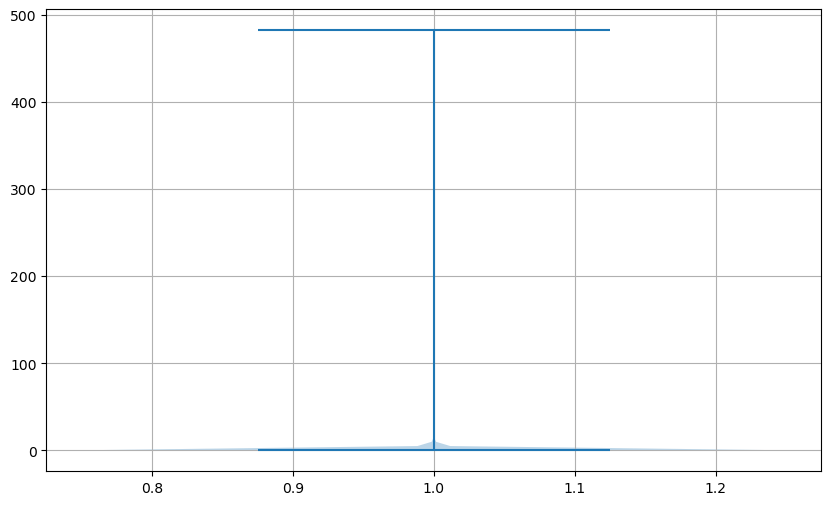

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the violin plot
plt.figure(figsize=(10, 6))
plt.violinplot(erros)
#plt.xlabel("Group")
#plt.ylabel("Values")
#plt.title("Violin Plot of Values by Group")
plt.grid(True)
plt.show()
